In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, load_mpl_presets
import numpy as np
import vice
import sys
print(sys.version_info)
load_mpl_presets()

/Users/jamesjohnson/Work/Research/VICErepos/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=10, micro=4, releaselevel='final', serial=0)


/var/folders/mh/jf6nfbl941l_41vvvwwk5wbr0000gn/T/ipykernel_17902/939383696.py:119: ScienceWarning: The Limongi & Chieffi (2018), ApJS, 237, 13 study published only the results which adopted a fixed yield of nickel-56, and these are the yields which are
installed in this version of VICE. For this reason, we caution the user on these yields of iron peak elements.
  y_fe, _ = vice.yields.ccsne.fractional("Fe", **kwargs)


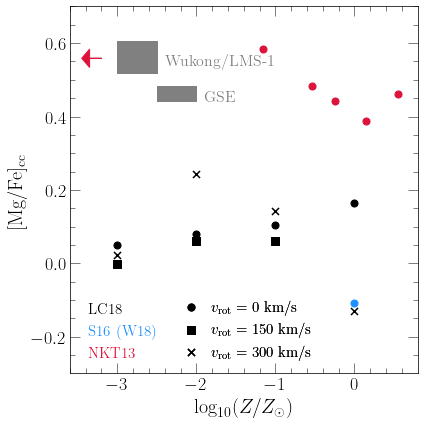

In [19]:
# fig = plt.figure(figsize = (6, 10))
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)
ax.set_xlabel(r"$\log_{10}(Z / Z_\odot)$")
ax.set_ylabel(r"[Mg/Fe]$_\text{cc}$")
ax.set_xlim([-3.6, 0.8])
ax.set_ylim([-0.3, 0.7])
# ax2 = fig.add_subplot(211)
# ax1 = fig.add_subplot(212, sharex = ax2)
# plt.setp(ax2.get_xticklabels(), visible = False)
# ax1.set_ylabel(r"[O/Fe]$_\text{cc}$")
# ax1.set_xlabel(r"$\log_{10}(Z / Z_\odot)$")
# ax2.set_ylabel(r"[Mg/Fe]$_\text{cc}$")
# ax1.set_xlim([-3.2, 0.8])
# ax1.set_ylim([0.28, 0.92])
# ax2.set_ylim([-0.3, 0.7])

gse_fecc = 7.78e-4
gse_fecc_err = 0.37e-4
wuk_fecc = 6.17e-4
wuk_fecc_err = 0.62e-4
yalpha = 0.01
gse_plateau = np.log10(yalpha / gse_fecc) - np.log10(vice.solar_z["o"] / vice.solar_z["fe"])
wuk_plateau = np.log10(yalpha / wuk_fecc) - np.log10(vice.solar_z["o"] / vice.solar_z["fe"])
gse_plateau_err = 1 / np.log(10) * gse_fecc_err / gse_fecc
wuk_plateau_err = 1 / np.log(10) * wuk_fecc_err / wuk_fecc
kwargs = {"color": named_colors()["grey"]}
ax.fill_between([-2.5, -2], 2 * [gse_plateau - gse_plateau_err], 2 * [gse_plateau + gse_plateau_err], **kwargs)
ax.fill_between([-3, -2.5], 2 * [wuk_plateau - wuk_plateau_err], 2 * [wuk_plateau + wuk_plateau_err], **kwargs)
kwargs["fontsize"] = 16
ax.text(-1.9, gse_plateau - gse_plateau_err, "GSE", **kwargs)
ax.text(-2.4, wuk_plateau - wuk_plateau_err / 2, "Wukong/LMS-1", **kwargs)

# gse_fecc = 7.78e-4
# wuk_fecc = 6.17e-4
# yalpha = 0.01
# gse_plateau = np.log10(yalpha / gse_fecc) - np.log10(vice.solar_z["o"] / vice.solar_z["fe"])
# wuk_plateau = np.log10(yalpha / wuk_fecc) - np.log10(vice.solar_z["o"] / vice.solar_z["fe"])
# kwargs = {"c": named_colors()["grey"], "linestyle": ":"}
# ax.axhline(gse_plateau, **kwargs)
# ax.axhline(wuk_plateau, **kwargs)
# kwargs = {"color": named_colors()["grey"], "fontsize": 20}
# ax.text(ax.get_xlim()[0] + 0.15, gse_plateau + 0.02, "GSE", **kwargs)
# ax.text(ax.get_xlim()[0] + 0.15, wuk_plateau + 0.02, "Wukong/LMS-1", **kwargs)
    
TABLES = ["LC18", "S16/W18", "NKT13"]
# TABLES = ["LC18", "S16/W18", "WW95"]
LABELS = {
    "LC18": "Limongi \& Chieffi (2018)",
    "S16/W18": "Sukhbold et al. (2016)",
    "NKT13": "Nomoto, Kobayashi \& Tominaga (2013)",
    "WW95": "Woosley \& Weaver (1995)"
}
LOGZ = {
    "LC18": [-3, -2, -1, 0],
    "S16/W18": [0],
    "NKT13": [-float("inf"), -1.15, -0.54, -0.24, 0.15, 0.55],
    "WW95": [-2, -1, 0]
}
ROTATION = {
    "LC18": [0, 150, 300],
    "S16/W18": [0],
    "NKT13": [0],
    "WW95": [0]
}
UPPERS = {
    "LC18": 120,
    "S16/W18": 120,
    "NKT13": 40,
    "WW95": 150
}
COLORS = {
    "LC18": "black",
    "S16/W18": "dodgerblue",
    "NKT13": "crimson",
    "WW95": "crimson"
}
MARKERS = {
    0: "circle",
    150: "square",
    300: "x"
}
LINESTYLES = {
    0: "-",
    150: "-.",
    300: ":"
}

lines = []
for table in TABLES:
    kwargs = {"c": COLORS[table]}
    if table == "S16/W18":
        kwargs["label"] = "S16 (W18)"
    else:
        kwargs["label"] = table
    lines.append(ax.plot([-10, -9], [-10, -9], **kwargs)[0])
kwargs = {
    "loc": mpl_loc("lower left"),
    "ncol": 1,
    "handlelength": 0,
    "fontsize": 15
}
leg = ax.legend(**kwargs)
fancy_legend(leg, [COLORS[table] for table in TABLES])
for line in lines: line.remove()
ax.add_artist(leg)

for table in TABLES:
    for rotation in ROTATION[table]:
        for logz in LOGZ[table]:
            kwargs = {
                "study": table,
                "MoverH": logz,
                "rotation": rotation,
                "m_upper": UPPERS[table]
            }
#             y_o, _ = vice.yields.ccsne.fractional("O", **kwargs)
            y_mg, _ = vice.yields.ccsne.fractional("Mg", **kwargs)
            y_fe, _ = vice.yields.ccsne.fractional("Fe", **kwargs)
#             ofe_cc = np.log10(y_o / y_fe) - np.log10(vice.solar_z["o"] / vice.solar_z["fe"])
            mgfe_cc = np.log10(y_mg / y_fe) - np.log10(vice.solar_z["mg"] / vice.solar_z["fe"])
            kwargs = {
                "c": COLORS[table],
                "marker": markers()[MARKERS[rotation]],
                "s": 50
            }
            if table == "LC18" and logz == 0: kwargs["label"] = r"$v_\text{rot} = %d$ km/s" % (rotation)
#             if np.isinf(logz): logz = -3.2
            if np.isinf(logz):
                ax.arrow(-3.2, mgfe_cc, -0.15, 0, head_width = 0.05, head_length = 0.1, color = kwargs["c"])
            else:
#             ax1.scatter(logz, ofe_cc, **kwargs)
                ax.scatter(logz, mgfe_cc, **kwargs)
            
kwargs = {
    "loc": mpl_loc("lower center"),
    "ncol": 1,
    "fontsize": 15,
#     "bbox_to_anchor": (0.01, 0.8)
}
leg = ax.legend(**kwargs)
ax.add_artist(leg)

plt.tight_layout()
plt.subplots_adjust(hspace = 0)
plt.savefig("../paper/yield-comparison.pdf")
plt.show()

/var/folders/mh/jf6nfbl941l_41vvvwwk5wbr0000gn/T/ipykernel_33542/2733731249.py:107: ScienceWarning: The Limongi & Chieffi (2018), ApJS, 237, 13 study published only the results which adopted a fixed yield of nickel-56, and these are the yields which are
installed in this version of VICE. For this reason, we caution the user on these yields of iron peak elements.
  y_fe, _ = vice.yields.ccsne.fractional("Fe", **kwargs)


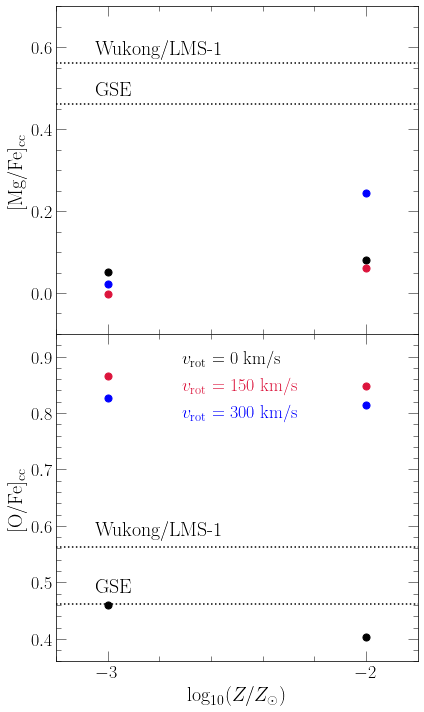

In [23]:
fig = plt.figure(figsize = (6, 10))
ax2 = fig.add_subplot(211)
ax1 = fig.add_subplot(212, sharex = ax2)
plt.setp(ax2.get_xticklabels(), visible = False)
ax1.set_ylabel(r"[O/Fe]$_\text{cc}$")
ax1.set_xlabel(r"$\log_{10}(Z / Z_\odot)$")
ax2.set_ylabel(r"[Mg/Fe]$_\text{cc}$")
ax1.set_xlim([-3.2, -1.8])
ax1.set_ylim([0.36, 0.94])
ax2.set_ylim([-0.1, 0.7])
ax1.set_xticks([-3, -2])
ax2.set_yticks([0, 0.2, 0.4, 0.6])

gse_fecc = 7.78e-4
wuk_fecc = 6.17e-4
yalpha = 0.01
gse_plateau = np.log10(yalpha / gse_fecc) - np.log10(vice.solar_z["o"] / vice.solar_z["fe"])
wuk_plateau = np.log10(yalpha / wuk_fecc) - np.log10(vice.solar_z["o"] / vice.solar_z["fe"])
for ax in [ax1, ax2]:
    kwargs = {"c": named_colors()["black"], "linestyle": ":"}
    ax.axhline(gse_plateau, **kwargs)
    ax.axhline(wuk_plateau, **kwargs)
    kwargs = {"color": named_colors()["black"], "fontsize": 20}
    ax.text(ax.get_xlim()[0] + 0.15, gse_plateau + 0.02, "GSE", **kwargs)
    ax.text(ax.get_xlim()[0] + 0.15, wuk_plateau + 0.02, "Wukong/LMS-1", **kwargs)
    
TABLES = ["LC18"]
# TABLES = ["LC18", "S16/W18", "NKT13"]
# TABLES = ["LC18", "S16/W18", "WW95"]
LABELS = {
    "LC18": "Limongi \& Chieffi (2018)",
    "S16/W18": "Sukhbold et al. (2016)",
    "NKT13": "Nomoto, Kobayashi \& Tominaga (2013)",
    "WW95": "Woosley \& Weaver (1995)"
}
LOGZ = {
#     "LC18": [-3, -2, -1, 0],
    "LC18": [-3, -2],
    "S16/W18": [0],
    "NKT13": [-1.15, -0.54, -0.24, 0.15, 0.55],
    "WW95": [-2, -1, 0]
}
ROTATION = {
    "LC18": [0, 150, 300],
    "S16/W18": [0],
    "NKT13": [0],
    "WW95": [0]
}
UPPERS = {
    "LC18": 120,
    "S16/W18": 120,
    "NKT13": 40,
    "WW95": 150
}
# COLORS = {
#     "LC18": "crimson",
#     "S16/W18": "dodgerblue",
#     "NKT13": "crimson",
#     "WW95": "crimson"
# }
COLORS = {
    0: "black",
    150: "crimson",
    300: "blue"
}
# MARKERS = {
#     0: "circle",
#     150: "square",
#     300: "x"
# }
# LINESTYLES = {
#     0: "-",
#     150: "-.",
#     300: ":"
# }

# lines = []
# for table in TABLES:
#     kwargs = {"c": COLORS[table]}
#     if table == "S16/W18":
#         kwargs["label"] = "S16 (W18)"
#     else:
#         kwargs["label"] = table
#     lines.append(ax.plot([-10, -9], [-10, -9], **kwargs)[0])
# kwargs = {
#     "loc": mpl_loc("lower left"),
#     "ncol": 1,
#     "handlelength": 0,
#     "fontsize": 15
# }
# leg = ax2.legend(**kwargs)
# fancy_legend(leg, [COLORS[table] for table in TABLES])
# for line in lines: line.remove()
# ax2.add_artist(leg)

for table in TABLES:
    for rotation in ROTATION[table]:
        for logz in LOGZ[table]:
            kwargs = {
                "study": table,
                "MoverH": logz,
                "rotation": rotation,
                "m_upper": UPPERS[table]
            }
            y_o, _ = vice.yields.ccsne.fractional("O", **kwargs)
            y_mg, _ = vice.yields.ccsne.fractional("Mg", **kwargs)
            y_fe, _ = vice.yields.ccsne.fractional("Fe", **kwargs)
            ofe_cc = np.log10(y_o / y_fe) - np.log10(vice.solar_z["o"] / vice.solar_z["fe"])
            mgfe_cc = np.log10(y_mg / y_fe) - np.log10(vice.solar_z["mg"] / vice.solar_z["fe"])
            kwargs = {
                "c": COLORS[rotation],
                "marker": markers()["circle"],
                "s": 50
            }
#             if table == "LC18" and logz == 0: kwargs["label"] = r"$v_\text{rot} = %d$ km/s" % (rotation)
            ax1.scatter(logz, ofe_cc, **kwargs)
            ax2.scatter(logz, mgfe_cc, **kwargs)

lines = []
for rotation in COLORS.keys():
    kwargs = {
        "c": named_colors()[COLORS[rotation]],
        "label": r"$v_\text{rot} = %d$ km/s" % (rotation)
    }
    lines.append(ax1.plot([-10, -9], [-10, -9], **kwargs)[0])
kwargs = {
    "loc": mpl_loc("upper center"),
    "ncol": 1,
    "fontsize": 18,
    "handlelength": 0
#     "bbox_to_anchor": (0.01, 0.8)
}
leg = ax1.legend(**kwargs)
fancy_legend(leg, [COLORS[_] for _ in COLORS.keys()])
for line in lines: line.remove()
# ax2.add_artist(leg)

plt.tight_layout()
plt.subplots_adjust(hspace = 0)
plt.savefig("../paper/yield-comparison.pdf")
plt.show()

In [28]:
vice.yields.ccsne.fractional("o", study = "LC18", MoverH = 0)

[0.0036512768277795864, 3.688250595611259e-06]

In [29]:
0.778 / (0.778 + 1.23)

0.38745019920318724

In [30]:
0.617 / (0.617 + 2.42)

0.20316101415870927